In [78]:
import pandas as pd
import matplotlib.pyplot as plt


In [79]:
df = pd.read_csv(r'C:\Users\hs414\OneDrive\Desktop\Major_2024\data\train.csv')



In [80]:
majority_class = df[df['label'] == 0]
minority_class = df[df['label'] == 1]

In [81]:
from sklearn.utils import resample
majority_downsample = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

In [82]:
downsampled_df = pd.concat([majority_downsample, minority_class])
downsampled_df.head()

,id,label,tweet
8824,8825,0,#body to body massage with a ending oil #mas...
31854,31855,0,@user @ my call back! #casting #castingcall ...
28079,28080,0,help creates the #environment of #togetherness...
29214,29215,0,summer with friendâ¨ð¥ #summer #friend #li...
20025,20026,0,follow me on snapchat at awesomecutenes7 #snap...


In [83]:
downsampled_df.reset_index(drop=True, inplace=True)
downsampled_df.drop('id', axis=1, inplace=True)
downsampled_df

,label,tweet
0,0,#body to body massage with a ending oil #mas...
1,0,@user @ my call back! #casting #castingcall ...
2,0,help creates the #environment of #togetherness...
3,0,summer with friendâ¨ð¥ #summer #friend #li...
4,0,follow me on snapchat at awesomecutenes7 #snap...
...,...,...
4479,1,lady banned from kentucky mall. @user #jcpenn...
4480,1,@user omfg i'm offended! i'm a mailbox and i'...
4481,1,@user @user you don't have the balls to hashta...
4482,1,"makes you ask yourself, who am i? then am i a..."


['Normal Tweets', 'Hate Tweets']


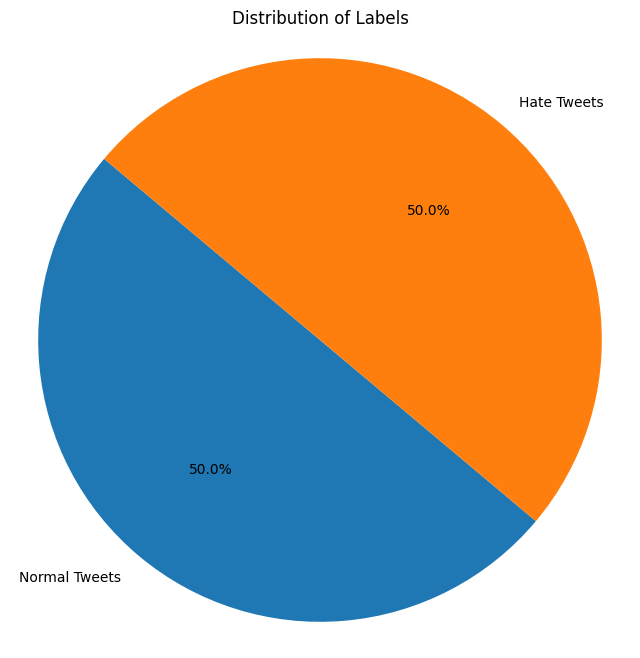

In [84]:
label_counts = downsampled_df['label'].value_counts()


labels = ['Normal Tweets','Hate Tweets']
counts = label_counts.values

print(labels)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

In [85]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hs414\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hs414\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hs414\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hs414\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [86]:
X = downsampled_df['tweet']
y = downsampled_df['label']
X

0       #body to body massage with a   ending oil #mas...
1        @user @ my call back!  #casting #castingcall ...
2       help creates the #environment of #togetherness...
3       summer with friendâ¨ð¥ #summer  #friend #li...
4       follow me on snapchat at awesomecutenes7 #snap...
                              ...                        
4479    lady banned from kentucky mall. @user  #jcpenn...
4480    @user omfg i'm offended! i'm a  mailbox and i'...
4481    @user @user you don't have the balls to hashta...
4482     makes you ask yourself, who am i? then am i a...
4483    @user #sikh #temple vandalised in in #calgary,...
Name: tweet, Length: 4484, dtype: object

In [87]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
tweets = X.copy()
corpus = []
for i in range(len(tweets)):
    review = re.sub('[^a-zA-Z]', ' ', tweets[i])
    review = review.lower()
    review = review.split()
    
    review = ' '.join(review)
    corpus.append(review)

In [88]:
tokenized_tweets = [word_tokenize(tweet.lower()) for tweet in corpus]
stop_words = set(stopwords.words('english'))
filtered_tweets = []
for tweet_tokens in tokenized_tweets:
    filtered_tokens = [word for word in tweet_tokens if word not in stop_words]
    filtered_tweets.append(filtered_tokens)

In [89]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_tweets = [' '.join([lemmatizer.lemmatize(word) for word in tweet]) for tweet in filtered_tweets]

In [90]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(lemmatized_tweets)
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(lemmatized_tweets)

In [91]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf, y, test_size=0.2, random_state=42)

In [92]:
vocab_size = len(tfidf_vectorizer.vocabulary_)
vocab_size
embedding_dim = 64


## Using Feed Forward Neural Network for the given Task

In [93]:
from tensorflow.keras.layers import Dropout

# Define the probability for dropout
dropout_rate = 0.5

# Build FNN model with an embedding layer and dropout layers
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(X_train_tfidf.shape[1],)),
    Dropout(dropout_rate),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(dropout_rate),  
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 9507, 64)          608448    
                                                                 
 dropout_17 (Dropout)        (None, 9507, 64)          0         
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 


 dense_30 (Dense)            (None, 1)                 65        
                                                                 
Total params: 612673 (2.34 MB)
Trainable params: 612673 (2.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [95]:
history = model.fit(X_train_tfidf.toarray(), y_train, epochs=10, validation_data=(X_test_tfidf.toarray(), y_test), batch_size=32)


Epoch 1/10
113/113 [==============================] - 20s 171ms/step - loss: 0.6931 - accuracy: 0.5127 - val_loss: 0.6936 - val_accuracy: 0.4939
Epoch 2/10
113/113 [==============================] - 26s 232ms/step - loss: 0.6938 - accuracy: 0.5004 - val_loss: 0.6934 - val_accuracy: 0.4939
Epoch 3/10
113/113 [==============================] - 25s 218ms/step - loss: 0.6932 - accuracy: 0.4929 - val_loss: 0.6932 - val_accuracy: 0.4939
Epoch 4/10
113/113 [==============================] - 25s 225ms/step - loss: 0.6937 - accuracy: 0.4968 - val_loss: 0.6932 - val_accuracy: 0.4939
Epoch 5/10
113/113 [==============================] - 32s 287ms/step - loss: 0.6939 - accuracy: 0.4862 - val_loss: 0.6933 - val_accuracy: 0.4939
Epoch 6/10
113/113 [==============================] - 33s 289ms/step - loss: 0.6931 - accuracy: 0.4979 - val_loss: 0.6936 - val_accuracy: 0.4939
Epoch 7/10
113/113 [==============================] - 28s 245ms/step - loss: 0.6933 - accuracy: 0.4968 - val_loss: 0.6934 - val_ac

## Using CNN to Classify

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D

model = Sequential()

# Add Convolutional layers
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(vocab_size, 1)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 9503, 128)         768       
                                                                 
 conv1d_9 (Conv1D)           (None, 9499, 64)          41024     
                                                                 
 global_max_pooling1d_4 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 128)               8320      
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                     

In [97]:

X_train_tfidf_dense = X_train_tfidf.toarray()

X_train_tfidf_reshaped = X_train_tfidf_dense.reshape(X_train_tfidf_dense.shape[0], X_train_tfidf_dense.shape[1], 1)

import numpy as np
y_train_np = np.array(y_train)
history = model.fit(X_train_tfidf_reshaped, y_train_np, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
30/90 [=========>....................] - ETA: 1:33 - loss: 0.6935 - accuracy: 0.4979

## Using CNN with one hot encoding


In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
one_hot_results = tokenizer.texts_to_sequences(lemmatized_tweets)

In [ ]:
one_hot_results

[[601, 601, 1366, 1645, 427, 1366, 601, 4476, 1366, 2807, 4477, 4478],
 [1, 182, 114, 2055, 4480, 271, 272, 2056, 4481, 659, 1646, 201],
 [253, 2808, 990, 2809, 13, 4482, 2810, 155, 1149, 2811],
 [176, 453, 176, 453, 74, 2057, 4485, 481, 396],
 [207, 892, 892, 347, 208, 24, 1367],
 [1, 4489, 1150, 1, 4490, 2058, 2059, 4491, 1, 360],
 [4494, 4495, 453, 311, 4496],
 [55, 543, 24, 220, 2812, 4498, 4499, 122],
 [2446, 202, 127, 370, 720, 4502],
 [33, 247, 482, 2060, 2813, 144],
 [2061, 511, 74, 893, 894, 893, 135],
 [620, 721, 255, 288, 166, 1368, 896, 2814, 133, 662, 4503],
 [1, 4504, 159, 2815, 2816, 991, 483],
 [335, 159, 30, 532, 602, 957],
 [4508, 1369, 1, 13, 40, 335, 4509, 289, 1151, 1, 1152, 13],
 [4510, 603, 1153, 130, 1154, 990, 130, 992, 256, 2062],
 [326, 33, 512, 145],
 [722, 1370, 263, 2817, 170, 4512, 4513, 4514],
 [290, 2063, 2064, 4515, 4516],
 [253, 371, 104, 33, 2065, 291, 1648, 336, 75, 723],
 [271, 24, 62, 105, 62, 69, 514],
 [95, 1, 1, 4517],
 [994, 604, 4518, 453, 45

In [ ]:
max_length = max(len(tweet) for tweet in tokenized_tweets)
max_length

33

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index)+1
vocab_size

11744

In [ ]:
from keras.preprocessing.sequence import pad_sequences
one_hot_padded = pad_sequences(one_hot_results, maxlen=max_length, padding='pre') #padding='pre' means that the padding will be added at the beginning of the sequence
one_hot_padded

array([[    0,     0,     0, ...,  2807,  4477,  4478],
       [    0,     0,     0, ...,   659,  1646,   201],
       [    0,     0,     0, ...,   155,  1149,  2811],
       ...,
       [    0,     0,     0, ...,  1318,  1872, 11743],
       [    0,     0,     0, ...,   375,   257,   190],
       [    0,     0,     0, ...,   309,   310,   260]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train_ohe, X_test_ohe, y_train, y_test = train_test_split(one_hot_padded, y, test_size=0.2, random_state=42)

In [ ]:

X_train_ohe_reshaped = X_train_ohe.reshape(X_train_ohe.shape[0], -1)
X_train_ohe_reshaped = X_train_ohe_reshaped.reshape(X_train_ohe_reshaped.shape[0], X_train_ohe_reshaped.shape[1], vocab_size)


y_train_np = np.array(y_train)

ValueError: cannot reshape array of size 118371 into shape (3587,33,11744)

In [ ]:
input_shape = (vocab_size,) 
model1 = Sequential()
embedding_dim = 100
model1.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=input_shape))
model1.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model1.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model1.add(GlobalMaxPooling1D())
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 11744, 100)        1174400   
                                                                 
 conv1d_6 (Conv1D)           (None, 11740, 128)        64128     
                                                                 
 conv1d_7 (Conv1D)           (None, 11736, 64)         41024     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                      

In [ ]:
history1 = model1.fit(X_train_ohe_reshaped, y_train_np, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\hs414\OneDrive\Desktop\Major_2024\venv\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\hs414\OneDrive\Desktop\Major_2024\venv\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\hs414\OneDrive\Desktop\Major_2024\venv\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\hs414\OneDrive\Desktop\Major_2024\venv\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\hs414\OneDrive\Desktop\Major_2024\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\hs414\OneDrive\Desktop\Major_2024\venv\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 11744), found shape=(None, 33)
